In [12]:
using DataFrames
using CSV

In [13]:
data = DataFrame(CSV.File("71-80.csv"))
first(data,10)

Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String3,String3,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,71,E,A,104,99,104,90,70,65,18,26
2,71,K,D,64,75,63,47,59,47,23,32
3,71,M,B,840,699,668,576,631,613,45,86
4,71,A,B,43,57,80,92,81,81,13,13
5,71,M,A,8,60,31,102,134,202,11,11
6,71,P,A,17,26,13,6,19,42,17,37
7,71,M,H,16,31,51,74,104,98,12,14
8,71,R,H,276,281,321,312,371,328,38,91
9,71,T,K,427,469,435,344,338,312,27,59


In [14]:
using Pkg
Pkg.add("RDatasets")
using MultivariateStats, RDatasets, Plots

X = data[:,["univ_rank","cit_2017","cit_2018","cit_2019","cit_2020","cit_2021"]]
Y = data[:,["cit_2022"]]
display(X)
display(Y)


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Row,univ_rank,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021
,Int64,Int64,Int64,Int64,Int64,Int64
1,71,104,99,104,90,70
2,71,64,75,63,47,59
3,71,840,699,668,576,631
4,71,43,57,80,92,81
5,71,8,60,31,102,134
6,71,17,26,13,6,19
7,71,16,31,51,74,104
8,71,276,281,321,312,371
9,71,427,469,435,344,338


Row,cit_2022
,Int64
1,65
2,47
3,613
4,81
5,202
6,42
7,98
8,328
9,312


In [15]:
#apply pca 
# import Pkg
# Pkg.add("Transforms")
# using Transforms
# using MultivariateStats
# function apply_pca(X, num_components)
#     X_matrix = Matrix(X)
#     pca_model = fit(PCA, X_matrix, maxoutdim = num_components)
#     return reconstruct(pca_model, X_matrix)
# end

# X_pca = apply_pca(X, 2)
#above approch not working, cant apply pca directly
#matrix insimilarities

# applying pca manually
using Statistics, LinearAlgebra
function apply_pca(X::DataFrame, num_components::Int)
    
    X_matrix = Matrix(X)
    
#     X_centered = X_matrix .-mean(X_matrix, dims = 1)
    X_standardized = (X_matrix .- mean(X_matrix, dims = 1)) ./ std(X_matrix, dims = 1)

    cov_matrix = cov(X_standardized, dims = 1)
    eigenvalues, eigenvectors = eigen(cov_matrix)
     #println(eigenvalues)
     #println(eigenvectors)
    
    idx = sortperm(eigenvalues, rev = true)
    eigenvectors = eigenvectors[:, idx]
    #print(eigenvectors)
    #print("---------------------")
    
    X_pca = X_standardized*eigenvectors[:,1: num_components]
    
#      # Calculate explained variance
#     total_variance = sum(eigenvalues)
#     print(total_variance)
#     explained_variance = eigenvalues[idx] ./ total_variance
#     ,explained_variance[1:num_components]
#     return X_pca
    
end

X_pca_manual = apply_pca(X, 2)    





100×2 Matrix{Float64}:
  1.08566     1.55381
  1.22427     1.55195
 -1.47335     1.58299
  1.18889     1.54975
  1.21013     1.54621
  1.4213      1.54979
  1.25851     1.54714
  0.146833    1.55685
 -0.258011    1.57
  1.29902     1.55091
  1.12531     1.19841
 -3.33601     1.24851
  0.424607    1.20561
  ⋮          
  1.43054    -1.22095
  0.0383323  -1.2065
  0.926049   -1.56333
  1.39372    -1.56953
  0.647972   -1.55539
  1.35906    -1.5682
 -1.71938    -1.53573
 -0.292321   -1.54862
 -5.90048    -1.52914
 -0.568618   -1.54611
  1.26369    -1.56716
  1.34509    -1.57072

In [16]:
quantiles = quantile(data.cit_2022, [0.25, 0.5, 0.75])
colors = ifelse.(data.cit_2022 .<= quantiles[1], "red",
            ifelse.(data.cit_2022 .<= quantiles[2], "orange",
            ifelse.(data.cit_2022 .<= quantiles[3], "green","blue")))

100-element Vector{String}:
 "red"
 "red"
 "blue"
 "red"
 "orange"
 "red"
 "red"
 "green"
 "green"
 "red"
 "orange"
 "blue"
 "green"
 ⋮
 "red"
 "green"
 "orange"
 "orange"
 "orange"
 "red"
 "blue"
 "green"
 "blue"
 "green"
 "red"
 "orange"

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


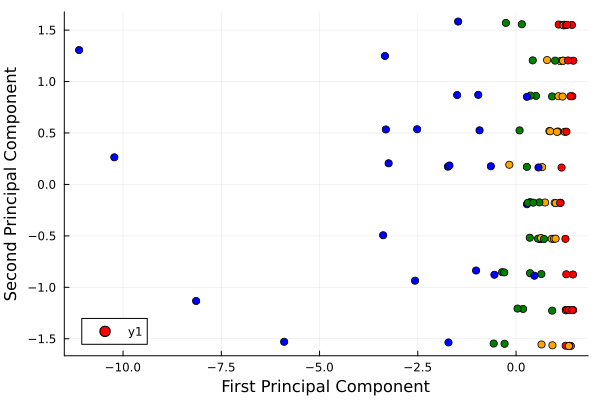

In [18]:
using Pkg
Pkg.add("Plots")

using Plots

scatter(X_pca_manual[:,1], X_pca_manual[:,2], color=colors, xlabel="First Principal Component", ylabel="Second Principal Component")




